# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [1]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')
df_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,20.0,28.0,23.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,19.0,27.0,22.0,5,no


In [2]:
df_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [6]:
df_08.fuel.value_counts()


Gasoline    984
ethanol       1
gas           1
CNG           1
Name: fuel, dtype: int64

In [9]:
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [10]:
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [12]:
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

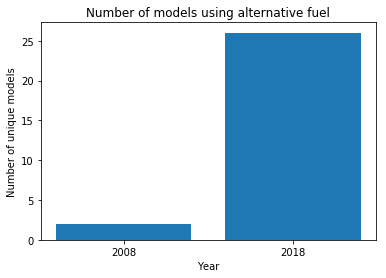

In [22]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of models using alternative fuel")
plt.xlabel("Year")
plt.ylabel("Number of unique models")
plt.show()

In [16]:
total_08 = df_08.model.nunique()
total_08

377

In [20]:
total_18 = df_18.model.nunique()
total_18

357

In [26]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

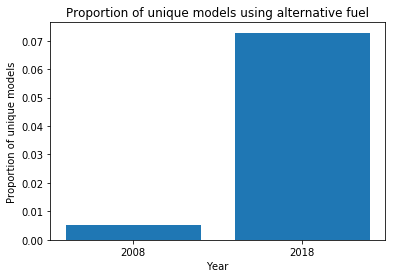

In [27]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of unique models using alternative fuel")
plt.xlabel("Year")
plt.ylabel("Proportion of unique models")
plt.show()

### Q2: How much have vehicle classes improved in fuel economy?  

In [39]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              24.506173
large car        24.222222
midsize car      24.000000
minivan          20.933333
pickup           23.267606
small car        24.128676
station wagon    24.750000
van              20.619048
Name: cmb_mpg, dtype: float64

In [30]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [32]:
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car         -0.813131
midsize car        3.884058
minivan           -0.133333
pickup            -4.677862
small SUV               NaN
small car          1.292376
special purpose         NaN
standard SUV            NaN
station wagon      2.779412
van                     NaN
Name: cmb_mpg, dtype: float64

In [33]:
inc.dropna(inplace = True)


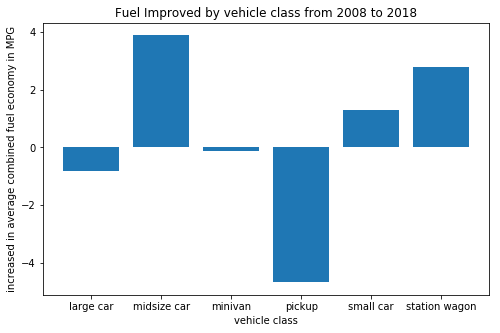

In [40]:
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title("Fuel Improved by vehicle class from 2008 to 2018")
plt.xlabel("vehicle class")
plt.ylabel("increased in average combined fuel economy in MPG")
plt.show()


### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [46]:
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [47]:
smart_08 = df_08.query('smartway == "Yes"')
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
smart_18 = df_18.query('smartway == "Yes"')
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1.753846,3.923077,4.879121,31.483516,39.296703,34.439560,7.538462
std,0.420399,0.452911,1.769087,11.239180,9.410980,10.214596,0.860332
min,1.200000,3.000000,3.000000,25.000000,27.000000,27.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.600000,4.000000,5.000000,28.000000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,30.000000,40.000000,34.000000,8.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4: What features are associated with better fuel economy?

In [49]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,3.645427,6.189024,6.669207,27.472561,35.304878,30.411585,5.027439
std,1.282335,1.970951,0.963174,11.033692,9.024857,10.081539,2.011247
min,1.300000,2.000000,6.000000,21.000000,27.000000,25.000000,0.000000
25%,2.500000,4.000000,6.000000,23.000000,31.000000,26.000000,4.000000
50%,3.500000,6.000000,6.000000,25.000000,33.000000,28.000000,5.000000
75%,4.300000,8.000000,7.000000,28.000000,36.000000,31.000000,6.000000
max,8.000000,16.000000,9.500000,113.000000,99.000000,106.000000,9.000000


In [50]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000
